In [42]:
import os
import numpy as np
from scipy.io import wavfile
from python_speech_features import mfcc
from python_speech_features import delta


In [38]:
path = "./elec-301-speech-emotion-classification/data/data/"
os.chdir(path)

In [39]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
import csv


In [40]:
# read train data
data_all = []
samplerate_all = []
label = []
for file in os.listdir():     
    samplerate, data = wavfile.read(file)
    samplerate_all.append(samplerate)
    if (len(data.shape) > 1):
        data_all.append(data[:,0])
    else:
        data_all.append(data)
    label.append(str(file)[ : -7])

data_all = np.asarray(data_all)
label = np.asarray(label)


C:\Users\Weili Fan\AppData\Local\Temp\ipykernel_56744\4200010588.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(file)
C:\Users\Weili Fan\AppData\Local\Temp\ipykernel_56744\4200010588.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_all = np.asarray(data_all)


In [50]:
mfcc_all = []
for i in range(len(data_all)):
    features_mfcc = mfcc(data_all[i], samplerate_all[i], nfft=1200)
    features_mfcc = features_mfcc[:, 1:]
    features_mfcc = features_mfcc.T
    mfccs_processed = np.mean(features_mfcc,axis=1)
    mfcc_all.append(mfccs_processed)
mfcc_all = np.asarray(mfcc_all)
mfcc_all.shape


(1125, 12)

In [45]:

path = "../../test/test"
os.chdir(path)


In [46]:

test_data = []
test_samplerate = []
fileName = []
NUM = []

for file in os.listdir():     
    samplerate, data = wavfile.read(file)
    test_samplerate.append(samplerate)
    if (len(data.shape) > 1):
        test_data.append(data[:,0])
    else:
        test_data.append(data)
    fileName.append(str(file[: -4]))
    NUM.append(str(file[6: 9]))

test_data = np.asarray(test_data)
test_samplerate = np.asarray(test_samplerate)
fileName = np.asarray(fileName)

C:\Users\Weili Fan\AppData\Local\Temp\ipykernel_56744\3221594953.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(file)
C:\Users\Weili Fan\AppData\Local\Temp\ipykernel_56744\3221594953.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_data = np.asarray(test_data)


In [48]:

mfcc_test = []
for i in range(len(test_data)):
    features_mfcc = mfcc(test_data[i], test_samplerate[i], nfft=1200)
    features_mfcc = features_mfcc[:, 1:]
    features_mfcc = features_mfcc.T
    mfccs_processed = np.mean(features_mfcc,axis=1)
    mfcc_test.append(mfccs_processed)
mfcc_test = np.asarray(mfcc_test)



(315, 39, 2)

In [49]:
lkf = svm.SVC(C = 10, kernel='rbf', gamma = 'scale')
lkf.fit(mfcc_all,label)

prediction = lkf.predict(mfcc_test)
accuracy = accuracy_score(label, lkf.predict(mfcc_all))
print(accuracy)

ValueError: Found array with dim 3. SVC expected <= 2.

In [60]:
# from sklearn.neighbors import NearestCentroid
# from sklearn.neighbors import NeighborhoodComponentsAnalysis

# nca = NeighborhoodComponentsAnalysis(n_components=3)
# nca.fit(mfcc_all,label)

# transformed = nca.transform(mfcc_all)
# transformed.shape

(1125, 3)

In [57]:
labelToNum = []
for emo in range(0, len(label)):
    if label[emo] == 'angry':
      labelToNum.append(0)
    if label[emo] == 'calm':
      labelToNum.append(1)
    if label[emo] == 'disgust':
      labelToNum.append(2)
    if label[emo] == 'fearful':
      labelToNum.append(3)
    if label[emo] == 'happy':
      labelToNum.append(4)
    if label[emo] == 'neutral':
      labelToNum.append(5)
    if label[emo] == 'sad':
      labelToNum.append(6)
    if label[emo] == 'surprised':
      labelToNum.append(7)

[]

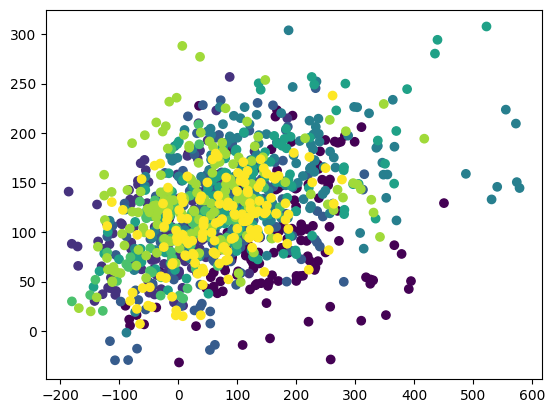

In [59]:
# plt.scatter(transformed[:,0], transformed[:,1], c=labelToNum)
# plt.plot()

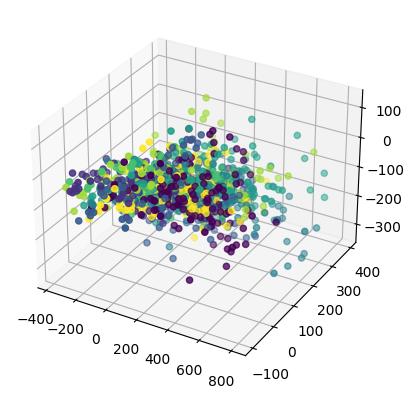

In [62]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # ax.scatter(transformed[:,0], transformed[:,1], transformed[:,2], c=labelToNum)
# # ax.view_init(0, 0)
# plt.show()

In [52]:
# NC = NearestCentroid()
# NC.fit(transformed,label)
# transformed_test = nca.transform(mfcc_test)
# prediction = NC.predict(transformed_test)

In [53]:
result = []
for i in range(prediction.shape[0]):
    result.append([fileName[i], prediction[i]])

In [28]:
path = "../../"
os.chdir(path)

In [36]:
import pandas as pd
DF = pd.DataFrame(sort_sample)
DF.columns = ['filename', 'label']
DF.to_csv("mfcc 39 SVM C = 10.csv", index=False)